## Esercizio
Fatto da me

### 1. Low Level TF

In [14]:
from keras.datasets.mnist import load_data

import tensorflow as tf
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = load_data()

In [6]:
x_train = x_train / 255.
x_test = x_test / 255.

In [10]:
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [74]:
class Mlp:
    def __init__(self, num_inits, activation  = None, dropout_rate = None):
        """
        args
        ---

        - num_units (list(int)): contiene il numero di unità di ogni strato
        - activation (str): funzione di attivazione degli hidden layer
        - dropout_rate (float): dropout rate post hidden layer
        """
        # inizializzare pesi della rete... fare un MLP a basso livello con tensorflow
        # dropout opzionale, fallo alla fine
        # num_inits è una lista num_inits = [784, 100, 100, 10] con i parametri della rete
        # standard deviation a 1 / sqrt( numero di unità in entrata = num_inits[0])
        
        self.num_inits = num_inits
        self.activation = activation

        self.W = [] # lista dei pesi
        self.b = [] # lista dei bias

        for k in range(len(num_inits)):
            for i in range(0, num_inits[k] ):

                n = num_inits[k]
                n1 = num_inits[k+1]
                
                weight = tf.Variable(
                    initial_value = tf.random.normal( shape = [n, n1], stddev=1/(n**(-1/2) )),
                    dtype = tf.float32,
                    trainable = True
                )
    
                bias = tf.Variable(
                    initial_value = tf.zeros( shape = [1, n1]),
                    dtype = tf.float32,
                    trainable = True
                )

                self.W.append(weight)
                self.b.append(bias)

        #print(self.W[0])
        #print("W0: ", W)
    
    def forward(self, x_train, y_train, epochs, lr, batch_size):

        losses = []
        self.a = []
        counter = 0
        
        for epoch in range(epochs):
            for i in range(0, x_train.shape[0], batch_size):
                
                # estrae le immagini:
                x_batch = x_train[i : i + batch_size].reshape(-1, 28*28)
                y_batch = y_train[i : i + batch_size]
                
                # forward pass
                with tf.GradientTape() as tape:

                    for n in num_inits:
                        for i in range(0, n):

                            if i == 0:
                                z0 = x_batch@self.W[0] + self.b[0]
                                a0 = sigmoid(z0)
                                
                                self.a.append(a0)
    
                            elif i == len(num_inits):
                                z_last = a[i-1]@self.W[i] + b[i]
                                
                            else: # i in 1 - n_strati
                                zn = self.a[i-1]@self.W[i] + b[i]
                                an = sigmoid(zn)
    
                                self.a.append(an)

                    # Loss
                    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(y_batch, z3)
                    mean_loss = tf.reduce_mean(loss)
        
                losses.append(mean_loss)

                # discesa gradiente
                gradients = tape.gradient(mean_loss, self.w + self.b)

                dW = gradients[:L]  # Gradients for weights of each layer
                db = gradients[L:] # Gradients for biases of each layer

                # passi della discesa pesi e bias
                for i in range(len(num_inits)):
                    self.w[i].assign_sub(dW*lr)
                    self.b[i].assign_sub(db*lr)

                if counter % 100 == 0:
                    losses = losses[-100:]
                    print(np.mean(losses))
                
                counter += 1


In [ ]:
# addestramento

EPOCHS = 10
LEARNING_RATE = 1e-3
BATCH_SIZE = 32

# fit

In [ ]:
# test
# calcola accuracy su test set

---

In [22]:
# Funzione di Attivazione
def sigmoid(t):
    return 1 / (1+tf.exp(-t))

def relu(t):
    return tf.maximum(t, 0.)

In [ ]:
# Mlp
mlp = Mlp(
    num_inits = [784, 100, 100, 10]
    #activation = sigmoid(t)
)

In [65]:
# Addestramento

EPOCHS = 10
LEARNING_RATE = 1e-3
BATCH_SIZE = 32

mlp.forward(x_train, y_train, EPOCHS, LEARNING_RATE, BATCH_SIZE)

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [32,785], In[1]: [784,785] [Op:MatMul] name: 

In [ ]:
# Vedi anche notebook del Prof.
# Cerca come fare un MLP con TF low level

### 2. Esercizio (lo stesso) con Keras

In [15]:
import keras
from keras.layers import Dense, Flatten
from keras.datasets.mnist import load_data

In [16]:
(x_train, y_train), (x_test, y_test) = load_data()

In [17]:
x_train = x_train / 255.
x_test = x_test / 255.

In [18]:
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [19]:
model = keras.Sequential(
    [
        Flatten(input_shape=[28,28]),
        Dense(100, "relu"),
        Dense(100, "relu"),
        Dense(10, "softmax")
    ]
)

In [20]:
model.compile(
    optimizer=keras.optimizers.Adam(), 
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()] 
)

In [21]:
from keras.callbacks import CSVLogger, TensorBoard, EarlyStopping, ModelCheckpoint

In [22]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [11]:
%tensorboard --logdir logdir --host localhost --port 8088 #--path_prefix /tensorboard

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-09-07 17:16:54.367229: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 17:16:54.419553: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 17:16:54.422189: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 17:16:55.198460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/naska/miniconda3/lib/python3.9/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /home/naska/miniconda3/lib/python3.9/site-packages/tens

In [23]:
callbacks = [
    TensorBoard(log_dir="logdir"),
    ModelCheckpoint("checkpoints/saved_model_{epoch:02d}.chkpt"), # see docs
    EarlyStopping(patience = 5, restore_best_weights=True) # https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
        # la mode: significa: cosa vuoldire per quella metrica "migliorare"? verso l'alto o il basso (deve aumentare o diminuire?)
]

In [25]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 100,
    validation_split = 0.2,
    shuffle = True,
    callbacks = callbacks
)

Epoch 1/100
1499/1500 [============================>.] - ETA: 0s - loss: 0.2656 - sparse_categorical_accuracy: 0.9209INFO:tensorflow:Assets written to: checkpoints/saved_model_01.chkpt/assets


INFO:tensorflow:Assets written to: checkpoints/saved_model_01.chkpt/assets


1500/1500 [==============================] - 9s 5ms/step - loss: 0.2655 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.1454 - val_sparse_categorical_accuracy: 0.9564
Epoch 2/100
1497/1500 [============================>.] - ETA: 0s - loss: 0.1128 - sparse_categorical_accuracy: 0.9665INFO:tensorflow:Assets written to: checkpoints/saved_model_02.chkpt/assets


INFO:tensorflow:Assets written to: checkpoints/saved_model_02.chkpt/assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.1129 - sparse_categorical_accuracy: 0.9665 - val_loss: 0.1074 - val_sparse_categorical_accuracy: 0.9677
Epoch 3/100
1490/1500 [============================>.] - ETA: 0s - loss: 0.0780 - sparse_categorical_accuracy: 0.9757INFO:tensorflow:Assets written to: checkpoints/saved_model_03.chkpt/assets


INFO:tensorflow:Assets written to: checkpoints/saved_model_03.chkpt/assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.0778 - sparse_categorical_accuracy: 0.9757 - val_loss: 0.0939 - val_sparse_categorical_accuracy: 0.9718
Epoch 4/100
1499/1500 [============================>.] - ETA: 0s - loss: 0.0582 - sparse_categorical_accuracy: 0.9822INFO:tensorflow:Assets written to: checkpoints/saved_model_04.chkpt/assets


INFO:tensorflow:Assets written to: checkpoints/saved_model_04.chkpt/assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.0582 - sparse_categorical_accuracy: 0.9822 - val_loss: 0.0958 - val_sparse_categorical_accuracy: 0.9726
Epoch 5/100
1499/1500 [============================>.] - ETA: 0s - loss: 0.0451 - sparse_categorical_accuracy: 0.9857INFO:tensorflow:Assets written to: checkpoints/saved_model_05.chkpt/assets


INFO:tensorflow:Assets written to: checkpoints/saved_model_05.chkpt/assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.0451 - sparse_categorical_accuracy: 0.9857 - val_loss: 0.0921 - val_sparse_categorical_accuracy: 0.9729
Epoch 6/100
1500/1500 [==============================] - ETA: 0s - loss: 0.0360 - sparse_categorical_accuracy: 0.9881INFO:tensorflow:Assets written to: checkpoints/saved_model_06.chkpt/assets


INFO:tensorflow:Assets written to: checkpoints/saved_model_06.chkpt/assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.0360 - sparse_categorical_accuracy: 0.9881 - val_loss: 0.0914 - val_sparse_categorical_accuracy: 0.9762
Epoch 7/100
1495/1500 [============================>.] - ETA: 0s - loss: 0.0313 - sparse_categorical_accuracy: 0.9894INFO:tensorflow:Assets written to: checkpoints/saved_model_07.chkpt/assets


INFO:tensorflow:Assets written to: checkpoints/saved_model_07.chkpt/assets


1500/1500 [==============================] - 9s 6ms/step - loss: 0.0313 - sparse_categorical_accuracy: 0.9894 - val_loss: 0.0993 - val_sparse_categorical_accuracy: 0.9745
Epoch 8/100
1497/1500 [============================>.] - ETA: 0s - loss: 0.0240 - sparse_categorical_accuracy: 0.9923INFO:tensorflow:Assets written to: checkpoints/saved_model_08.chkpt/assets


INFO:tensorflow:Assets written to: checkpoints/saved_model_08.chkpt/assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.0241 - sparse_categorical_accuracy: 0.9923 - val_loss: 0.1069 - val_sparse_categorical_accuracy: 0.9721
Epoch 9/100
1492/1500 [============================>.] - ETA: 0s - loss: 0.0237 - sparse_categorical_accuracy: 0.9921INFO:tensorflow:Assets written to: checkpoints/saved_model_09.chkpt/assets


INFO:tensorflow:Assets written to: checkpoints/saved_model_09.chkpt/assets


1500/1500 [==============================] - 8s 5ms/step - loss: 0.0238 - sparse_categorical_accuracy: 0.9921 - val_loss: 0.1154 - val_sparse_categorical_accuracy: 0.9721
Epoch 10/100
1493/1500 [============================>.] - ETA: 0s - loss: 0.0195 - sparse_categorical_accuracy: 0.9935INFO:tensorflow:Assets written to: checkpoints/saved_model_10.chkpt/assets


INFO:tensorflow:Assets written to: checkpoints/saved_model_10.chkpt/assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.0194 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.1200 - val_sparse_categorical_accuracy: 0.9744
Epoch 11/100
1492/1500 [============================>.] - ETA: 0s - loss: 0.0177 - sparse_categorical_accuracy: 0.9942INFO:tensorflow:Assets written to: checkpoints/saved_model_11.chkpt/assets


INFO:tensorflow:Assets written to: checkpoints/saved_model_11.chkpt/assets


1500/1500 [==============================] - 7s 5ms/step - loss: 0.0177 - sparse_categorical_accuracy: 0.9941 - val_loss: 0.1288 - val_sparse_categorical_accuracy: 0.9729


In [26]:
import matplotlib.pyplot as plt

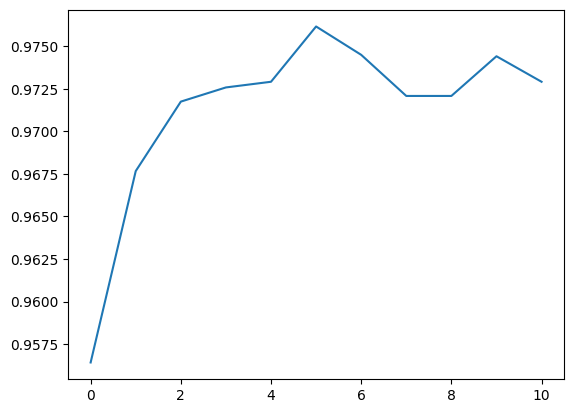

In [27]:
plt.plot(history.history["val_sparse_categorical_accuracy"])

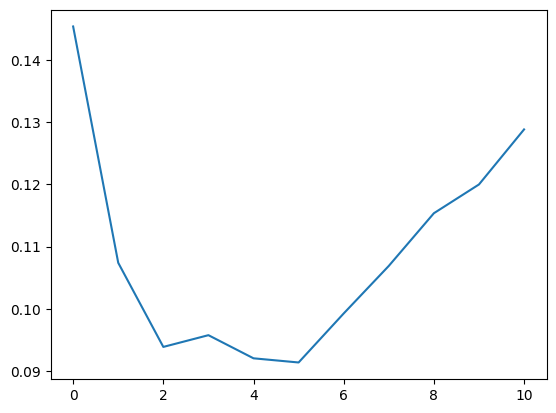

In [28]:
plt.plot(history.history["val_loss"])

## Esercizio 
versione del Prof. + appunti)

In [13]:
import tensorflow as tf

from keras.datasets.mnist import load_data
import numpy as np

import math

In [14]:
(x_train, y_train), (x_test, y_test) = load_data()

In [15]:
x_train = (x_train / 255).astype(np.float32)
x_test = (x_test / 255).astype(np.float32)

In [16]:
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [17]:
num_units = [784, 100, 100, 10]

In [18]:
def relu(t):
    return tf.maximum(t, 0.)

In [19]:
def sigmoid(t):
    return 1 / (1 + tf.exp(-t))

In [20]:
class ClassifierMlp:
    def __init__(self, num_units, activation, dropout_rate):
        """
        args
        ----
        - num_units (list(int)): contiene il numero di unità di ogni strato
        - activation (str): funzione di attivazione degli hidden layer
        - dropout_rate (float): dropoup rate post hidden layer
        """
        # pesi
        self.ws = []
        self.bs = []
        self.dropout_rate = dropout_rate
        self.hidden_n = len(num_units) - 2
        for i in range(len(num_units)-1):
            in_units = num_units[i]
            out_units = num_units[i+1]

            self.ws.append(tf.Variable(initial_value=tf.random.normal(shape=[in_units, out_units], stddev=1/math.sqrt(in_units)), trainable=True))
            self.bs.append(tf.Variable(tf.zeros(shape=[1, out_units]), trainable=True))

        # attivazione
        self.activation = dict(relu=relu, sigmoid=sigmoid).get(activation, lambda t: t)

    # weights in realtà sono i parametri (della rete)
    #    servono per calcolare il gradiente: derivata parziale della funzione di costo rispetto a un set di parametri (vedi appunti 6 Settembre)
    def get_weights(self):
        return self.ws + self.bs

    # una forward restituisce una predizione = l'output della rete
    #    va dagli input, attraverso tutti i layers (hidden layers) e poi all'ultimo
    def forward(self, x, training=False):
        # flatten
        x = tf.reshape(x, [x.shape[0], -1]) # reshape per avere un array 2D

        # hidden layers
        for i in range(self.hidden_n):
            x = x@self.ws[i] + self.bs[i]
            x = self.activation(x)

            # dropout
            if training:
                mask = tf.cast(tf.random.uniform(shape=[1, x.shape[1]]) > self.dropout_rate, tf.float32)
                x = x * mask / self.dropout_rate


        # last layer
        x = x@self.ws[-1] + self.bs[-1]

        return x

In [21]:
mlp = ClassifierMlp(num_units=[28*28, 100, 100, 10], activation="relu", dropout_rate=0.5)

In [30]:
epochs = 10
batch_size = 4
lr = 1e-3

losses = []
counter = 0

# per ogni epoca
for epoch in range(epochs):
    # per ogni batch
    for i in range(0, x_train.shape[0], batch_size):

        # batch_size, 28, 28 (estraggo batch)
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        print("y_batch: ", y_batch)
        print("x_batch shape: ", x_batch.shape)        

        # forward pass
        with tf.GradientTape() as tape:
            y_pred = mlp.forward(x_batch) # la forward returns a batch
            print("y_pred: ", y_pred)

            # calcolo della loss
            loss = tf.nn.sparse_softmax_cross_entropy_with_logits(y_batch, y_pred)
            mean_loss = tf.reduce_mean(loss) # media delle loss, del batch di images
            print("Loss: ", loss)
            print("mean_loss: ", mean_loss)

        losses.append(mean_loss)

        # discesa del gradiente
        weights = mlp.get_weights() # prende i parametri
        dweights = tape.gradient(mean_loss, weights) # deriva la funzione di costo rispetto ai parametri (vedi appunti 6 Settembre "Discesa del Gradiente")
        for w, dw in zip(weights, dweights): # per ogni peso e peso derivato
            w.assign_sub(dw*lr) # aggiorna i parametri: w_n+1 = w_n - (lr * dw) , dove lr = lambda e dw è la derivata parziale della funzione di costo rispetto ai parametri: dJ(theta)/dTheta) ovvero il Gradiente

        if counter % 100 == 0:
            losses = losses[-100:]
            print(np.mean(losses))

        counter += 1

y_batch:  [5 0 4 1]
x_batch shape:  (4, 28, 28)
y_pred:  tf.Tensor(
[[-0.01243128 -0.33442032 -0.1355434   0.8348943  -0.52699554  0.34956753
   0.05706307  0.03347887  0.12346976 -0.28736544]
 [ 2.7061503  -1.2610208   0.61890274  0.6810243  -0.24886936  1.0810316
  -0.33475858 -0.21308586 -0.518985   -0.37003714]
 [ 0.22329774 -0.5818911   0.30503398 -0.07860529  0.6975199   0.00673388
   0.21001211 -0.04937625 -0.48133492  0.29353273]
 [-0.66018796  1.8099495  -0.04396687 -0.09078685 -0.16911814  0.21847305
  -0.27009913 -0.42279774  0.44000533 -0.26160893]], shape=(4, 10), dtype=float32)
Loss:  tf.Tensor([2.0359297 0.5373992 1.7228714 0.8521767], shape=(4,), dtype=float32)
mean_loss:  tf.Tensor(1.2870942, shape=(), dtype=float32)
1.2870942
y_batch:  [9 2 1 3]
x_batch shape:  (4, 28, 28)
y_pred:  tf.Tensor(
[[-0.51586664 -0.22273894 -0.3162913  -0.623218    0.86619604 -0.39341548
  -0.12567414  0.41384694 -0.21041296  1.3845974 ]
 [ 0.15432711 -1.0489838   1.19091    -0.3028316   0.

KeyboardInterrupt: 

In [34]:
# test
all_ys_pred = []
all_ys_true = []

# Calcola l'accuracy sul test set
for i in range(0, x_test.shape[0], batch_size):

    # batch_size, 28, 28
    x_batch = x_test[i:i+batch_size]
    y_batch = y_test[i:i+batch_size]

    y_pred = mlp.forward(x_batch, training=False)
    #print("y_pred: ", y_pred)
    y_pred = np.argmax(y_pred, axis=1) # Returns the indices of the maximum values along an axis.
    #print("y_pred: ", y_pred)

    all_ys_pred += y_pred.tolist()
    print("all_ys_pred: ", all_ys_pred)
    all_ys_true += y_batch.tolist()
    print("all_ys_true: ", all_ys_true)

np.mean(np.array(all_ys_true) == np.array(all_ys_pred))

all_ys_pred:  [7, 2, 1, 0]
all_ys_true:  [7, 2, 1, 0]
all_ys_pred:  [7, 2, 1, 0, 4, 1, 9, 9]
all_ys_true:  [7, 2, 1, 0, 4, 1, 4, 9]
all_ys_pred:  [7, 2, 1, 0, 4, 1, 9, 9, 6, 7, 0, 2]
all_ys_true:  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6]
all_ys_pred:  [7, 2, 1, 0, 4, 1, 9, 9, 6, 7, 0, 2, 9, 0, 1, 3]
all_ys_true:  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5]
all_ys_pred:  [7, 2, 1, 0, 4, 1, 9, 9, 6, 7, 0, 2, 9, 0, 1, 3, 4, 7, 6, 4]
all_ys_true:  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]
all_ys_pred:  [7, 2, 1, 0, 4, 1, 9, 9, 6, 7, 0, 2, 9, 0, 1, 3, 4, 7, 6, 4, 7, 6, 4, 6]
all_ys_true:  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5]
all_ys_pred:  [7, 2, 1, 0, 4, 1, 9, 9, 6, 7, 0, 2, 9, 0, 1, 3, 4, 7, 6, 4, 7, 6, 4, 6, 4, 0, 7, 4]
all_ys_true:  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4]
all_ys_pred:  [7, 2, 1, 0, 4, 1, 9, 9, 6, 7, 0, 2, 9, 0, 1, 3, 4, 7, 6, 4, 7, 6, 4, 6, 4, 0, 7, 4, 0, 1, 3, 1]
all_ys_

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

#### Note sul codice (chieste a chatgpt)

Forward

   This code is part of a neural network model's forward pass implementation, which typically processes input data and propagates it through the layers of the network. Let's break down this specific part of the code:

```python
def forward(self, x, training=False):
    # flatten
    x = tf.reshape(x, [x.shape[0], -1])
```

Here's what this code does:

1. `def forward(self, x, training=False):`: This defines a method named `forward` within a class. This method appears to be a part of a neural network model, and it takes two parameters:
   - `self`: This is a reference to the instance of the class. It's used to access attributes and methods of the class.
   - `x`: This is the input data or tensor that will be processed by the network.
   - `training=False`: This is a boolean parameter with a default value of `False`. It's used to indicate whether the network is in training mode. In many deep learning models, certain operations (like dropout or batch normalization) behave differently during training and inference, so this parameter allows you to control that behavior.

2. `x = tf.reshape(x, [x.shape[0], -1])`: This line of code reshapes the input tensor `x`. It uses TensorFlow (often denoted as `tf`) to perform this operation.

   - `tf.reshape(x, [x.shape[0], -1])`: The `tf.reshape()` function is used to change the shape of a tensor while preserving its total number of elements. In this case:
      - `x` is the input tensor.
      - `[x.shape[0], -1]` is the target shape. It specifies that the first dimension should remain the same (`x.shape[0]`), while the second dimension is inferred as `-1`. The use of `-1` means that TensorFlow should automatically calculate the size of the second dimension based on the total number of elements in the tensor, ensuring that the total number of elements remains the same as in the original tensor.

   The purpose of reshaping the input tensor in this manner is often to convert it from a multi-dimensional tensor (e.g., an image with height, width, and channels) into a 2D tensor where all the input data is flattened into a single vector. This flattened vector can then be fed into a fully connected (dense) layer of a neural network. It's a common preprocessing step in many deep learning models when working with structured or image data.

So, this code takes the input tensor `x`, reshapes it into a 2D tensor (flattening it), and assigns the result back to `x`. After this operation, `x` is typically ready to be passed through other layers of the neural network 

ction, which results in better model performance.l performance.

Discesa del Gradiente

    The code you provided appears to be implementing the gradient descent algorithm to update the weights of a neural network (`mlp`). Gradient descent is a common optimization algorithm used in training machine learning models, including neural networks. Let's break down this code step by step:

```python
# discesa del gradiente
weights = mlp.get_weights()
```

- `weights = mlp.get_weights()`: This line retrieves the current weights of the neural network `mlp`. These weights include the parameters that the network has learned during training, such as the weights of the neural connections and biases.

```python
dweights = tape.gradient(mean_loss, weights)
```

- `dweights = tape.gradient(mean_loss, weights)`: This line calculates the gradients of the loss function (`mean_loss`) with respect to the weights of the neural network. The `tape.gradient()` function is part of TensorFlow's automatic differentiation framework. It computes the gradients of a specified target (in this case, `mean_loss`) with respect to a list of source tensors (in this case, `weights`). These gradients represent how the loss would change with small changes in the model's weights.

```python
for w, dw in zip(weights, dweights):
    w.assign_sub(dw * lr)
```

- `for w, dw in zip(weights, dweights):`: This loop iterates through the weights and their corresponding gradients.

- `w.assign_sub(dw * lr)`: For each weight `w`, this line updates the weight using the gradient descent update rule. Here's what each part of the update does:
   - `dw * lr`: This term represents the scaled gradient, where `dw` is the gradient of the loss with respect to the weight, and `lr` is the learning rate. The learning rate is a hyperparameter that controls the size of the steps taken during optimization.
   - `w.assign_sub(...)`: This method updates the weight `w` by subtracting the scaled gradient from it. The `assign_sub` method performs an in-place subtraction, effectively moving the weight in the direction that reduces the loss.

So, in summary, this code performs one step of gradient descent optimization by calculating the gradients of the loss with respect to the model's weights and then updating the weights using these gradients and a learning rate (`lr`). This process is repeated iteratively to train the neural network by minimizing the loss function, which results in better model performance.

#### Risorse utili

+ [Derivate Parziali](https://www.youmath.it/lezioni/analisi-due/varie/1149-derivate-parziali.html)
+ [Cross Entropy](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)